In [1]:
from keras.datasets import fashion_mnist

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from IPython.core import display as ICD
plt.style.use("seaborn")

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Constant zone
COLOR = 'white'
#FONT = 'Adobe'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['figure.facecolor'] = 'black'

plt.rc('axes', titlesize=25) #fontsize of the title
plt.rc('axes', labelsize=19) #fontsize of the x and y labels
plt.rc('xtick', labelsize=19) #fontsize of the x tick labels
plt.rc('ytick', labelsize=19) #fontsize of the y tick labels
#plt.rcParams['font.family'] = FONT

## Preprocessing and analyzing the data

In [4]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [5]:
print("Training data shape:",trainX.shape)
print("Training data label shape:",trainy.shape)
print("Testing data shape:",testX.shape)
print("Testing data label shape:",testy.shape)
print("Training data type:",trainX.dtype)
print("Training data label type:",trainy.dtype)
print("Testing data type:",testX.dtype)
print("Testing data label type:",testy.dtype)

Training data shape: (60000, 28, 28)
Training data label shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing data label shape: (10000,)
Training data type: uint8
Training data label type: uint8
Testing data type: uint8
Testing data label type: uint8


In [6]:
#Preprocessing training data
print("Amount of samples:",len(trainX[:]))
sampleDF = pd.DataFrame(data = trainX.reshape(60000,28*28))
print("Training data")
ICD.display(sampleDF)
labelDF = pd.DataFrame(data = trainy, columns = ["Label"])
print("Training labels")
ICD.display(labelDF)
data = pd.concat([sampleDF, labelDF], axis = 1)
print("Final data-frame")
ICD.display(data)

Amount of samples: 60000
Training data


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,66,54,50,5,0,1,0,0,0,0


Training labels


,Label
0,9
1,0
2,0
3,3
4,0
...,...
59995,5
59996,1
59997,3
59998,0


Final data-frame


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,3
59998,0,0,0,0,0,0,0,0,0,0,...,54,50,5,0,1,0,0,0,0,0


In [7]:
data["Label"].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: Label, dtype: int64

In [8]:
#plots an image given index
def plot_image(index, train_data, shape = 28):
    plt.imshow(trainX[index].reshape(shape, shape),cmap = plt.get_cmap('gray'), interpolation = 'nearest')
    print("Label:",trainy[index])

Label: 2


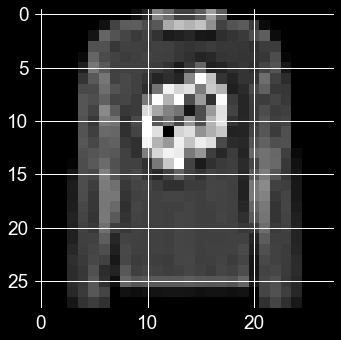

In [9]:
plot_image(123, trainX)

## Label information
    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot

## Models

## Dummy Model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [11]:
X = data.drop("Label", axis = 1).values
y = data['Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 42)

unique, counts = np.unique(y_test, return_counts=True)
print("Test class counts:",dict(zip(unique, counts)))

Test class counts: {0: 597, 1: 608, 2: 611, 3: 587, 4: 627, 5: 621, 6: 619, 7: 550, 8: 590, 9: 590}


In [12]:
from sklearn.dummy import DummyClassifier
dum = DummyClassifier(strategy="uniform")
dum.fit(X_train, y_train)
print("Dummy model train score:",dum.score(X_train, y_train))
print("Dummy model test score:",dum.score(X_test, y_test))

Dummy model train score: 0.09738888888888889
Dummy model test score: 0.1055


## KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [14]:
KNN_model = KNeighborsClassifier(weights = 'distance',n_neighbors = 4, n_jobs = os.cpu_count() - 1).fit(X_train, y_train)

KNN_score(train): 1.0
KNN_score(test): 0.859


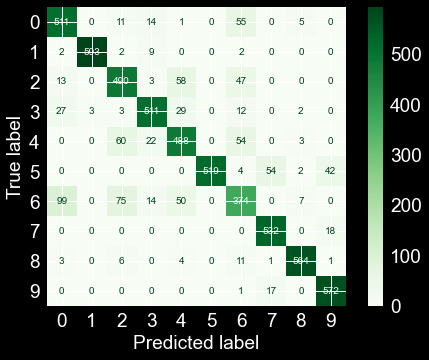

In [15]:
print("KNN_score(train):",KNN_model.score(X_train, y_train))
print("KNN_score(test):",KNN_model.score(X_test, y_test))
confusion_matrix = ConfusionMatrixDisplay.from_estimator(KNN_model, X_test, y_test, cmap = "Greens")

In [16]:
cv_model_KNN = cross_validate(KNN_model, X_train, y_train, cv = 3,scoring = 'accuracy', verbose = 3, return_train_score=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..................., score=(train=1.000, test=0.856) total time=  48.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.854) total time=  47.3s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.9min remaining:    0.0s


[CV] END ..................., score=(train=1.000, test=0.846) total time=  47.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.3min finished


In [17]:
print("Cross validation training scores:",cv_model_KNN['train_score'])
print("Cross validation test scores:",cv_model_KNN['test_score'])

Cross validation training scores: [1. 1. 1.]
Cross validation test scores: [0.85577778 0.85438889 0.8455    ]


## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
decision_tree_model = DecisionTreeClassifier(criterion = 'entropy', class_weight = None).fit(X_train, y_train)

Decision tree model score(train): 1.0
Decision tree model score(test): 0.809


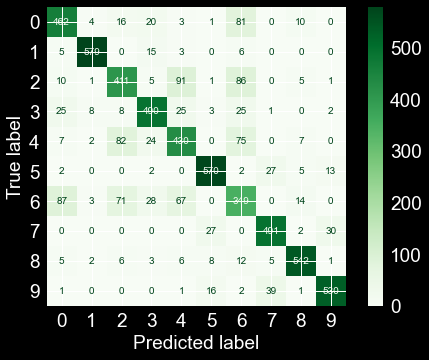

In [20]:
print("Decision tree model score(train):",decision_tree_model.score(X_train, y_train))
print("Decision tree model score(test):",decision_tree_model.score(X_test, y_test))
confusion_matrix = ConfusionMatrixDisplay.from_estimator(decision_tree_model, X_test, y_test, cmap = "Greens")

In [22]:
print("cv_scores mean:",cross_val_score(decision_tree_model, X_train, y_train, cv=3))

cv_scores mean: [0.804      0.80222222 0.80005556]


## Ada-boost

In [23]:
from sklearn.ensemble import AdaBoostClassifier

In [24]:
ada_boost_model = AdaBoostClassifier(algorithm = 'SAMME.R',learning_rate = 0.8,random_state = 42).fit(X_train, y_train)

ADA-boost score(train): 0.5964074074074074
ADA-boost score(test): 0.6018333333333333


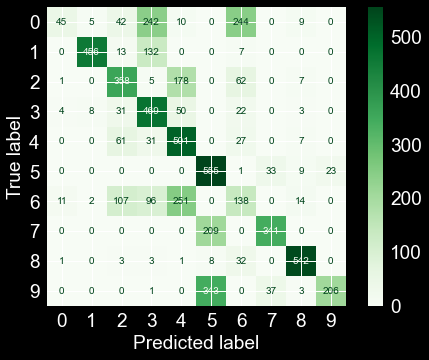

In [25]:
print("ADA-boost score(train):",ada_boost_model.score(X_train, y_train))
print("ADA-boost score(test):",ada_boost_model.score(X_test, y_test))
confusion_matrix = ConfusionMatrixDisplay.from_estimator(ada_boost_model, X_test, y_test, cmap = "Greens")

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'entropy', max_features = 'sqrt',n_estimators=100, random_state=42, n_jobs = os.cpu_count() - 1)
forest.fit(X_train, y_train)

print("Random forest train score:",forest.score(X_train, y_train))
print("Random forest test score:",forest.score(X_test, y_test))
cv_scores = cross_val_score(forest, X_train, y_train, cv=3)
print(cv_scores)
print("cv_scores mean: " + str(np.mean(cv_scores)))

Random forest train score: 1.0
Random forest test score: 0.885
[0.87983333 0.88       0.87855556]
cv_scores mean: 0.8794629629629629


#### Pixel importance using random forest

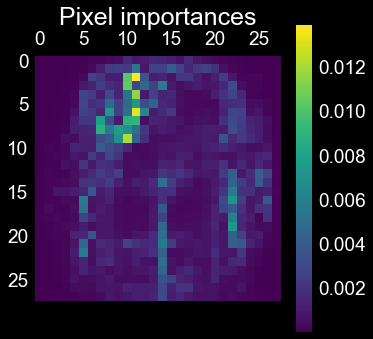

In [27]:
importances = forest.feature_importances_
imp_reshaped = importances.reshape((28, 28))

plt.matshow(imp_reshaped, cmap=plt.cm.viridis)
plt.title("Pixel importances")
plt.grid(False)
plt.colorbar()
plt.show()

## Applying grid search on the  models to tune hyper-parameters

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
def plot_grid_results(model_checked, grid_model): #Plots grid-search score results from best to worst
    grid_data = pd.DataFrame(grid_model.cv_results_)
    params = []
    for param in grid_model.best_params_:
        params.append("param_"+param)
    params.append('mean_test_score')
    
    grid_frame_mod = grid_data.loc[:,params]
    grid_frame_mod = grid_frame_mod.fillna(value = "None") ##Replace None with 'None' strings for plotability.
    grp = grid_frame_mod.groupby(by = params[:-1]).agg(lambda x: x).mean_test_score.nlargest(n = grid_data.shape[0])
    min_value = grid_data['mean_test_score'].min()
    max_value = grid_data['mean_test_score'].max()
    
    ICD.display(grid_data)#Display the results data-frame
    
    
    
    plt.figure(facecolor='black') 
    grp.plot(kind = "bar", figsize = (24, 8), color = "Blue")
    ax = plt.axes()
    ax.set_facecolor("black")
    plt.ylabel("Score")
    plt.title("Gridsearch results sorted from highest to lowest({0})".format(model_checked))
    ax.set_ylim([(min_value - 0.001) ,max_value])
    plt.show()
    msg = "Best {0} model: {1} with an accuracy of {2}".format(model_checked, grid_model.best_params_, grid_model.best_score_)
    print(msg)

## KNN

In [30]:
"""
KNN grid-search
"""

KNN = KNeighborsClassifier(n_jobs = os.cpu_count() - 1)
parameters = {'n_neighbors' : range(1,6), 'weights' : ['uniform', 'distance']}
KNN_grid = GridSearchCV(KNN, parameters, cv = 3 ,verbose = 4).fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ....n_neighbors=1, weights=uniform;, score=0.848 total time=  43.1s
[CV 2/3] END ....n_neighbors=1, weights=uniform;, score=0.844 total time=  43.8s
[CV 3/3] END ....n_neighbors=1, weights=uniform;, score=0.840 total time=  46.2s
[CV 1/3] END ...n_neighbors=1, weights=distance;, score=0.848 total time=  45.9s
[CV 2/3] END ...n_neighbors=1, weights=distance;, score=0.844 total time=  44.8s
[CV 3/3] END ...n_neighbors=1, weights=distance;, score=0.840 total time=  42.2s
[CV 1/3] END ....n_neighbors=2, weights=uniform;, score=0.846 total time=  44.8s
[CV 2/3] END ....n_neighbors=2, weights=uniform;, score=0.842 total time=  43.1s
[CV 3/3] END ....n_neighbors=2, weights=uniform;, score=0.836 total time=  45.0s
[CV 1/3] END ...n_neighbors=2, weights=distance;, score=0.848 total time=  43.8s
[CV 2/3] END ...n_neighbors=2, weights=distance;, score=0.844 total time=  44.4s
[CV 3/3] END ...n_neighbors=2, weights=distance;

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019335,0.000471,44.457629,1.343732,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.848056,0.844222,0.839500,0.843926,0.003499,8
1,0.021335,0.002625,44.370276,1.515420,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.848056,0.844222,0.839500,0.843926,0.003499,8
2,0.021837,0.001182,44.404651,0.857505,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.846111,0.842278,0.836167,0.841519,0.004095,10
3,0.019321,0.000228,44.246199,0.293589,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.848056,0.844278,0.839500,0.843944,0.003501,7
4,0.022197,0.002761,45.563836,0.704003,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.850111,0.847167,0.842000,0.846426,0.003353,6
5,0.021995,0.001641,45.718128,0.962853,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.852556,0.849667,0.844611,0.848944,0.003283,5
6,0.020334,0.000472,49.122632,0.878164,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.853222,0.852556,0.847056,0.850944,0.002763,3
7,0.022006,0.001409,50.487320,2.173115,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.855778,0.854389,0.845500,0.851889,0.004553,1
8,0.024337,0.002624,48.459218,1.552208,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.853167,0.850667,0.846611,0.850148,0.002701,4
9,0.023184,0.002711,48.251322,0.766902,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.854944,0.852889,0.847778,0.851870,0.003013,2


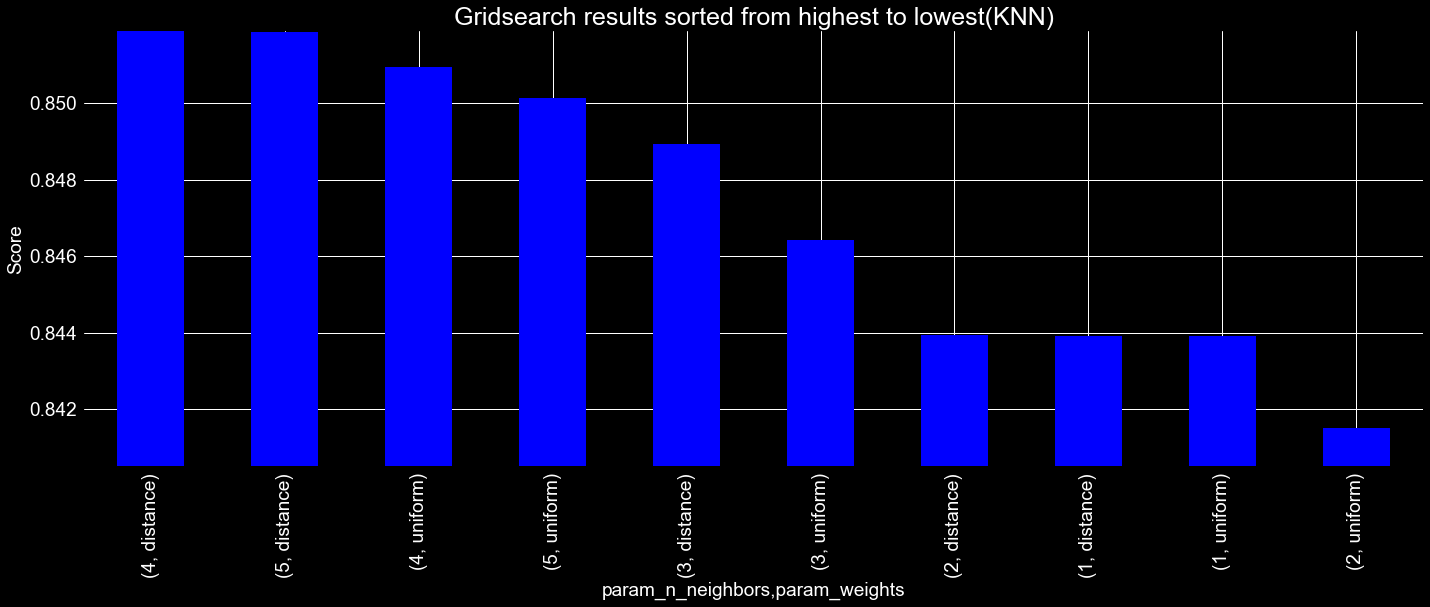

Best KNN model: {'n_neighbors': 4, 'weights': 'distance'} with an accuracy of 0.8518888888888889


In [31]:
plot_grid_results("KNN", grid_model = KNN_grid)

## Decision tree

In [32]:
"""
DTree grid-search
"""

DTree_model = DecisionTreeClassifier(random_state = 42)
parameters = {'criterion': ['gini', 'entropy'], 'class_weight' : [None, 'balanced']}
DTree_grid = GridSearchCV(DTree_model, parameters, cv = 3 ,verbose = 4).fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .class_weight=None, criterion=gini;, score=0.793 total time=  25.7s
[CV 2/3] END .class_weight=None, criterion=gini;, score=0.790 total time=  26.7s
[CV 3/3] END .class_weight=None, criterion=gini;, score=0.789 total time=  25.5s
[CV 1/3] END class_weight=None, criterion=entropy;, score=0.803 total time=  24.8s
[CV 2/3] END class_weight=None, criterion=entropy;, score=0.805 total time=  23.9s
[CV 3/3] END class_weight=None, criterion=entropy;, score=0.800 total time=  24.8s
[CV 1/3] END class_weight=balanced, criterion=gini;, score=0.794 total time=  27.3s
[CV 2/3] END class_weight=balanced, criterion=gini;, score=0.790 total time=  27.4s
[CV 3/3] END class_weight=balanced, criterion=gini;, score=0.787 total time=  25.9s
[CV 1/3] END class_weight=balanced, criterion=entropy;, score=0.805 total time=  25.6s
[CV 2/3] END class_weight=balanced, criterion=entropy;, score=0.802 total time=  25.1s
[CV 3/3] END class_wei

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,26.023727,0.532371,0.049415,0.001594,None,gini,"{'class_weight': None, 'criterion': 'gini'}",0.793111,0.789889,0.788833,0.790611,0.001820,3
1,24.545241,0.399773,0.043998,0.000372,None,entropy,"{'class_weight': None, 'criterion': 'entropy'}",0.803444,0.805444,0.800111,0.803000,0.002200,1
2,26.911752,0.694930,0.045005,0.000815,balanced,gini,"{'class_weight': 'balanced', 'criterion': 'gini'}",0.793667,0.789556,0.787222,0.790148,0.002664,4
3,25.240481,0.318815,0.043725,0.000394,balanced,entropy,"{'class_weight': 'balanced', 'criterion': 'ent...",0.804944,0.802278,0.799778,0.802333,0.002110,2


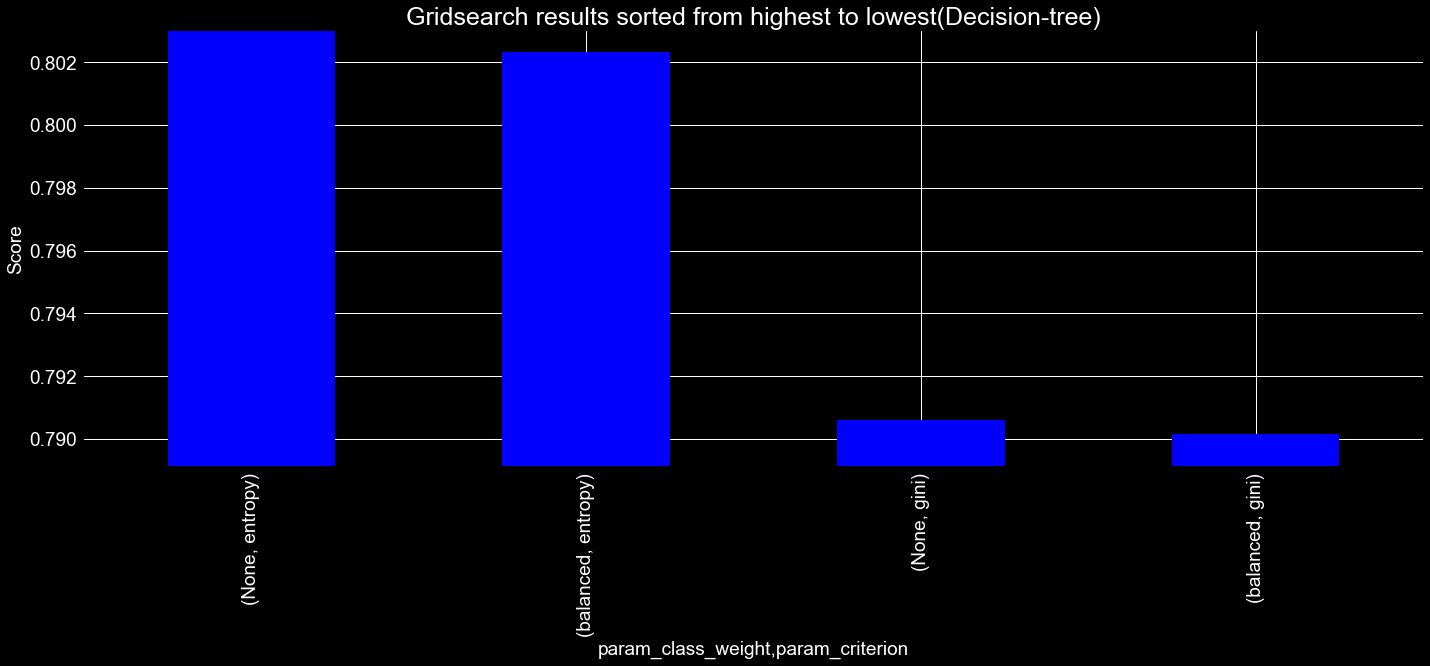

Best Decision-tree model: {'class_weight': None, 'criterion': 'entropy'} with an accuracy of 0.8029999999999999


In [33]:
plot_grid_results("Decision-tree", grid_model = DTree_grid)

## Ada-boost

In [34]:
"""
Ada-boost grid-search
"""

ADA_model = AdaBoostClassifier(random_state = 42)
parameters = {'learning_rate' : np.arange(0.2,1.2,0.2), 'algorithm' : ['SAMME', 'SAMME.R']}
ADA_grid = GridSearchCV(ADA_model, parameters, cv = 3 ,verbose = 4).fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END algorithm=SAMME, learning_rate=0.2;, score=0.336 total time= 1.3min
[CV 2/3] END algorithm=SAMME, learning_rate=0.2;, score=0.418 total time= 1.3min
[CV 3/3] END algorithm=SAMME, learning_rate=0.2;, score=0.360 total time= 1.3min
[CV 1/3] END algorithm=SAMME, learning_rate=0.4;, score=0.349 total time= 1.3min
[CV 2/3] END algorithm=SAMME, learning_rate=0.4;, score=0.435 total time= 1.3min
[CV 3/3] END algorithm=SAMME, learning_rate=0.4;, score=0.358 total time= 1.3min
[CV 1/3] END algorithm=SAMME, learning_rate=0.6000000000000001;, score=0.435 total time= 1.3min
[CV 2/3] END algorithm=SAMME, learning_rate=0.6000000000000001;, score=0.468 total time= 1.3min
[CV 3/3] END algorithm=SAMME, learning_rate=0.6000000000000001;, score=0.433 total time= 1.3min
[CV 1/3] END algorithm=SAMME, learning_rate=0.8;, score=0.433 total time= 1.3min
[CV 2/3] END algorithm=SAMME, learning_rate=0.8;, score=0.452 total time= 1.2min
[CV

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,74.050174,0.271721,2.023254,0.063286,SAMME,0.2,"{'algorithm': 'SAMME', 'learning_rate': 0.2}",0.335944,0.417611,0.360111,0.371222,0.034254,10
1,75.747490,0.675794,2.081075,0.033286,SAMME,0.4,"{'algorithm': 'SAMME', 'learning_rate': 0.4}",0.348944,0.435111,0.357833,0.380630,0.038695,9
2,74.321608,0.358220,2.097900,0.087985,SAMME,0.6,"{'algorithm': 'SAMME', 'learning_rate': 0.6000...",0.434833,0.467778,0.432833,0.445148,0.016022,8
3,74.016803,1.094761,2.003513,0.012015,SAMME,0.8,"{'algorithm': 'SAMME', 'learning_rate': 0.8}",0.432667,0.452056,0.520556,0.468426,0.037702,6
4,73.027601,0.889426,2.011810,0.032506,SAMME,1,"{'algorithm': 'SAMME', 'learning_rate': 1.0}",0.505611,0.386000,0.450556,0.447389,0.048882,7
5,74.945984,0.691091,2.338485,0.125841,SAMME.R,0.2,"{'algorithm': 'SAMME.R', 'learning_rate': 0.2}",0.549667,0.532278,0.532889,0.538278,0.008057,4
6,73.602646,0.969685,2.102684,0.034548,SAMME.R,0.4,"{'algorithm': 'SAMME.R', 'learning_rate': 0.4}",0.532111,0.578667,0.586889,0.565889,0.024119,2
7,74.125866,1.168865,2.133696,0.025216,SAMME.R,0.6,"{'algorithm': 'SAMME.R', 'learning_rate': 0.60...",0.480889,0.585667,0.569889,0.545481,0.046126,3
8,72.389736,0.662193,2.099810,0.034304,SAMME.R,0.8,"{'algorithm': 'SAMME.R', 'learning_rate': 0.8}",0.598389,0.549944,0.583889,0.577407,0.020301,1
9,71.976491,1.373142,2.123490,0.077934,SAMME.R,1,"{'algorithm': 'SAMME.R', 'learning_rate': 1.0}",0.507333,0.433389,0.504444,0.481722,0.034197,5


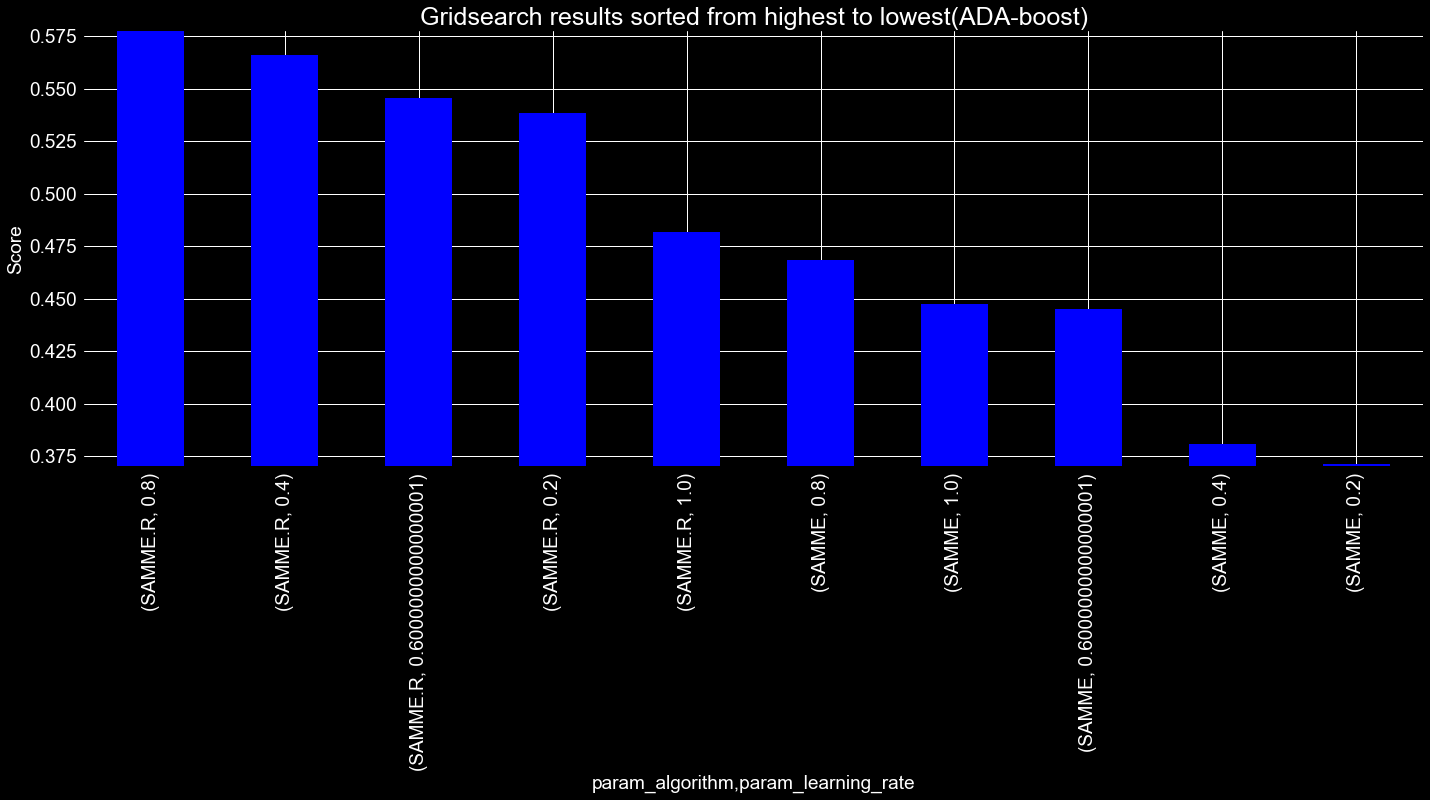

Best ADA-boost model: {'algorithm': 'SAMME.R', 'learning_rate': 0.8} with an accuracy of 0.5774074074074075


In [35]:
plot_grid_results("ADA-boost", grid_model = ADA_grid)

## Random Forest

In [36]:
"""
RFC grid-search
"""

RFC = RandomForestClassifier(n_jobs = os.cpu_count() - 1)
parameters = {"criterion": ["gini", "entropy"],
              "max_features": ["sqrt", "log2"]}
RFC_grid = GridSearchCV(RFC, parameters, cv = 3 ,verbose = 3).fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END .criterion=gini, max_features=sqrt;, score=0.882 total time=  19.8s
[CV 2/3] END .criterion=gini, max_features=sqrt;, score=0.878 total time=  16.9s
[CV 3/3] END .criterion=gini, max_features=sqrt;, score=0.876 total time=  16.9s
[CV 1/3] END .criterion=gini, max_features=log2;, score=0.876 total time=   7.2s
[CV 2/3] END .criterion=gini, max_features=log2;, score=0.875 total time=   7.0s
[CV 3/3] END .criterion=gini, max_features=log2;, score=0.870 total time=   7.1s
[CV 1/3] END criterion=entropy, max_features=sqrt;, score=0.884 total time=  20.8s
[CV 2/3] END criterion=entropy, max_features=sqrt;, score=0.877 total time=  20.7s
[CV 3/3] END criterion=entropy, max_features=sqrt;, score=0.878 total time=  20.7s
[CV 1/3] END criterion=entropy, max_features=log2;, score=0.878 total time=   9.2s
[CV 2/3] END criterion=entropy, max_features=log2;, score=0.874 total time=   9.1s
[CV 3/3] END criterion=entropy, max_fea

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,17.506688,1.394997,0.447885,0.007450,gini,sqrt,"{'criterion': 'gini', 'max_features': 'sqrt'}",0.882389,0.878389,0.876333,0.879037,0.002514,2
1,6.768818,0.095676,0.448052,0.026564,gini,log2,"{'criterion': 'gini', 'max_features': 'log2'}",0.876444,0.875500,0.870444,0.874130,0.002634,4
2,20.448541,0.044725,0.401165,0.007364,entropy,sqrt,"{'criterion': 'entropy', 'max_features': 'sqrt'}",0.884111,0.877056,0.878056,0.879741,0.003117,1
3,8.745487,0.101247,0.421997,0.000011,entropy,log2,"{'criterion': 'entropy', 'max_features': 'log2'}",0.877833,0.874056,0.873389,0.875093,0.001957,3


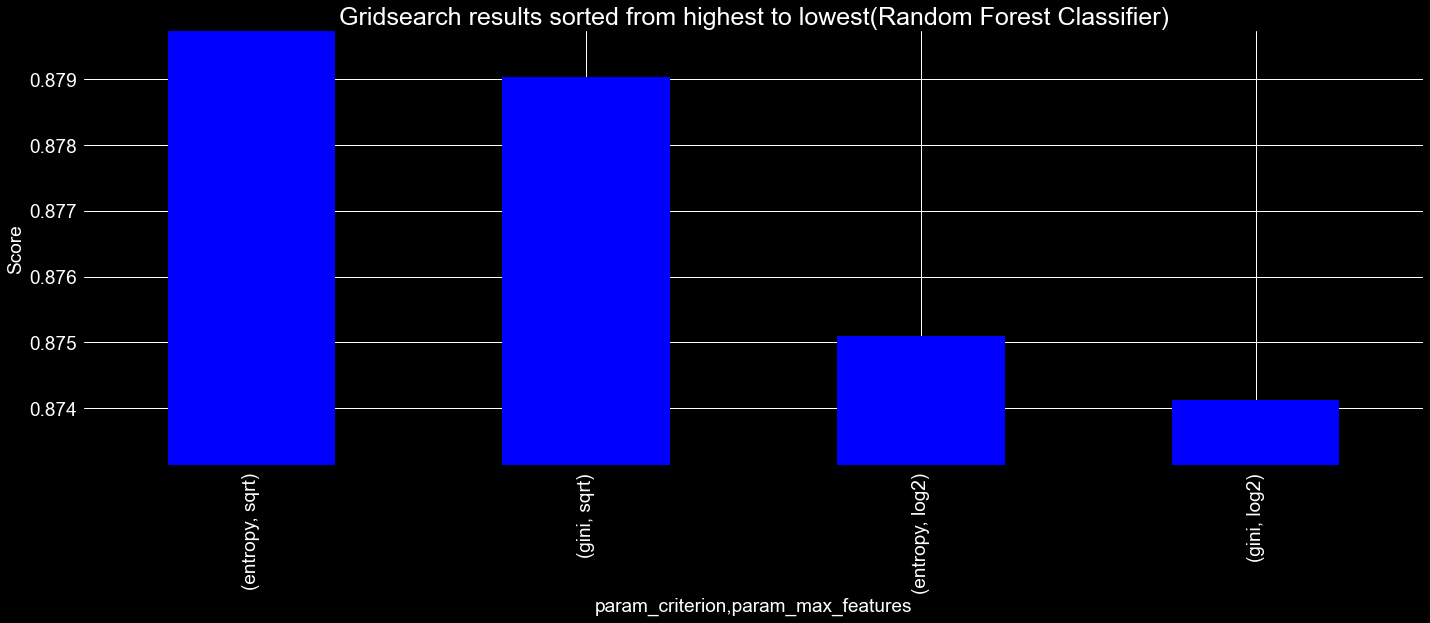

Best Random Forest Classifier model: {'criterion': 'entropy', 'max_features': 'sqrt'} with an accuracy of 0.8797407407407407


In [37]:
plot_grid_results("Random Forest Classifier", grid_model = RFC_grid)

## Removing 200 least important features and fitting them to RFC

In [38]:
features = pd.Series(forest.feature_importances_, index=range(784))
top_features = features.sort_values(ascending=False).head(600)
print(top_features)
top_features = top_features.index.values.tolist()

67     0.013885
179    0.013348
262    0.012205
123    0.011492
94     0.010482
         ...   
506    0.000324
492    0.000324
159    0.000320
696    0.000318
779    0.000313
Length: 600, dtype: float64


In [39]:
#Create a new dataframe where samples have the 600 most important pixels
top_data = data.iloc[:, top_features]
top_data = pd.concat([top_data, labelDF], axis = 1)
X_top_data = top_data.drop(['Label'], axis = 1).values
y_top_data = top_data['Label'].values
X_top_data_train, X_top_data_test, y_top_data_train, y_top_data_test = train_test_split(X_top_data, y_top_data, test_size = 0.15, random_state = 42)

In [41]:
forest = RandomForestClassifier(criterion = 'entropy', max_features = 'sqrt',n_estimators=100, random_state=42)
forest.fit(X_top_data_train, y_top_data_train)
print("Random forest score after cropping out not important pixels:",forest.score(X_top_data_test, y_top_data_test))
cv_scores = cross_val_score(forest, X_top_data_train, y_top_data_train, cv=3)
print(cv_scores)
print("cv_scores mean: " + str(np.mean(cv_scores)))

Random forest score after cropping out not important pixels: 0.8775555555555555
[0.88311765 0.87788235 0.87594118]
cv_scores mean: 0.8789803921568629
